# Multiple Linear Regression for Profit Prediction in Startups

In this analysis, we applied Linear Regression to predict the profit of startups based on various features provided in the dataset "50_startups.csv." The dataset includes the following columns:

- **R&D Spend:** Expenditure on Research and Development.
- **Administration:** Administrative expenditures.
- **Marketing Spend:** Expenditure on marketing activities.
- **State:** Location of the startup (categorical: New York, California, Florida).
- **Profit:** The target variable, representing the profit generated by the startup.

### Approach:

1. **Dataset Exploration:** We began by exploring the dataset to understand its structure and characteristics.
2. **Data Preprocessing:** Handled any missing values and encoded categorical variables, such as the 'State' column.
3. **Feature Scaling:** Applied necessary feature scaling to ensure uniformity across features.
4. **Train-Test Split:** Split the dataset into training and testing sets to evaluate model performance.
5. **Linear Regression Model:** Built a Linear Regression model using features to predict the 'Profit.'
6. **Model Evaluation:** Assessed the model's performance using metrics like Mean Squared Error, Mean Absolute Error, and R-squared.

### Dataset Sample:

| R&D Spend | Administration | Marketing Spend | State      | Profit     |
|------------|----------------|------------------|------------|------------|
| 165349.20  | 136897.80      | 471784.10       | New York   | 192261.83  |
| 162597.70  | 151377.59      | 443898.53       | California | 191792.06  |
| 153441.51  | 101145.55      | 407934.54       | Florida    | 191050.39  |
| ...        | ...            | ...              | ...        | ...        |

Stay tuned for detailed insights and the model's performance evaluation!


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [33]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532


## One Hot Encoding for Categorical Data

In the dataset, the 'State' column represents the location of the startup and is a categorical variable with three unique values: New York, California, and Florida. Linear Regression models require numerical input, so we applied One Hot Encoding to convert this categorical data into a format suitable for the model.

#### Why One Hot Encoding?

Linear Regression assumes a linear relationship between the features and the target variable. Categorical variables with more than two categories cannot be directly used in their raw form, as the algorithm might interpret ordinal relationships that don't exist. One Hot Encoding creates binary columns for each category, representing the presence or absence of that category.

#### Dummy Variables and Multiple Linear Regression

The One Hot Encoding process results in dummy variables, with each binary column corresponding to one category. When applying Multiple Linear Regression from scikit-learn, the `ColumnTransformer` is used to apply the One Hot Encoding only to the 'State' column, leaving other numeric columns unchanged.

Importantly, the dummy variable trap, a situation where two or more variables are highly correlated, is handled automatically. The `ColumnTransformer` includes the parameter `remainder='passthrough'`, which ensures that the remaining columns are kept unchanged. This prevents multicollinearity issues that could arise from perfect correlation among dummy variables.

### Example Code:

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a ColumnTransformer to apply One Hot Encoding to 'State' column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# Evaluating Error Metrics:

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 7514.2936596413765
Mean Squared Error: 83502864.03259295


# Relative Error Metrics:
## Percentage Error:
Calculate the percentage error by dividing the absolute error by the actual value. This can provide a relative measure of the error.

In [22]:
percentage_error = abs((y_test - y_pred) / y_test) * 100

In [27]:
percentage_error

array([ 0.26,  8.09,  9.36,  7.48,  6.55, 10.62, 16.47,  1.34,  3.28,
        1.04])

## Mean Percentage Error (MPE):

In [23]:
mpe = np.mean(percentage_error)

In [29]:
mpe

6.449754085356271

# Coefficient of Determination (R-squared): 
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model performance.

In [30]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

In [31]:
r_squared

0.9347068473282303

# Visual Inspection:
Visualize the predicted values against the actual values using scatter plots or other relevant plots. A scatter plot with a diagonal line (perfect predictions) can give you a visual sense of how well your model is performing.

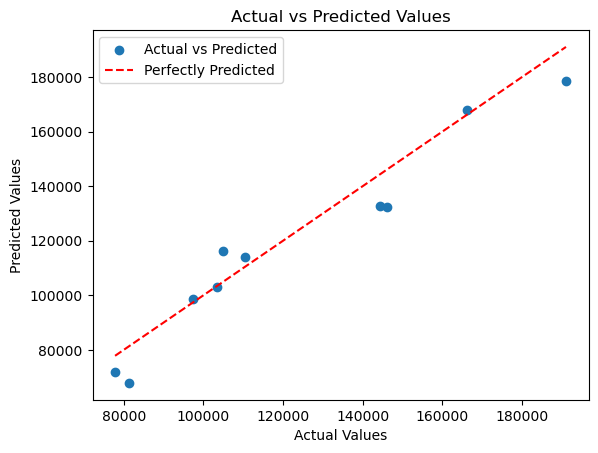

In [32]:
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfectly Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## Model Evaluation: R-squared Value

The R-squared (Coefficient of Determination) is a statistical measure indicating how well a regression model fits the data. It ranges from 0 to 1, where:

- **R-squared = 0:** Model doesn't explain variability.
- **R-squared = 1:** Model perfectly explains variability.

### Interpretation:

With an R-squared value of 0.93:

- **Implication:** Approximately 93% of the target variable's variability is explained.
- **Good Fit:** Indicates a strong correlation and a well-fitted model.
- **Predictive Power:** Model is reliable for predictions.

### Considerations:

- **Overfitting:** Ensure the model generalizes well.
- **Domain Knowledge:** Interpret results in the specific problem context.

In summary, an R-squared of 0.935 suggests a well-fitted linear regression model with strong predictive power.
